In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
# Simulate loading genomic data
# For this example, we're generating synthetic data
np.random.seed(42)
n_samples = 1500
n_features = 1000
X = np.random.rand(n_samples, n_features)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # Reduce to 50 dimensions for further analysis
X_pca = pca.fit_transform(X_scaled)

In [23]:
# Apply t-SNE for visualization (further reduce to 2D)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

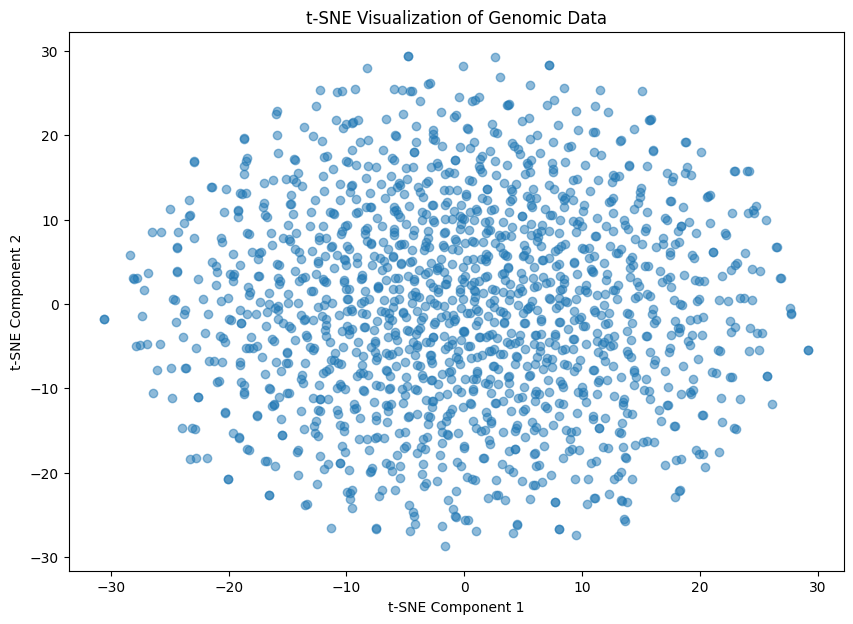

In [24]:
# Visualize the t-SNE result
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title("t-SNE Visualization of Genomic Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [25]:
# Perform clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [26]:
# Evaluate clustering with silhouette score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg}")

Silhouette Score for KMeans Clustering: 0.013215396214200278


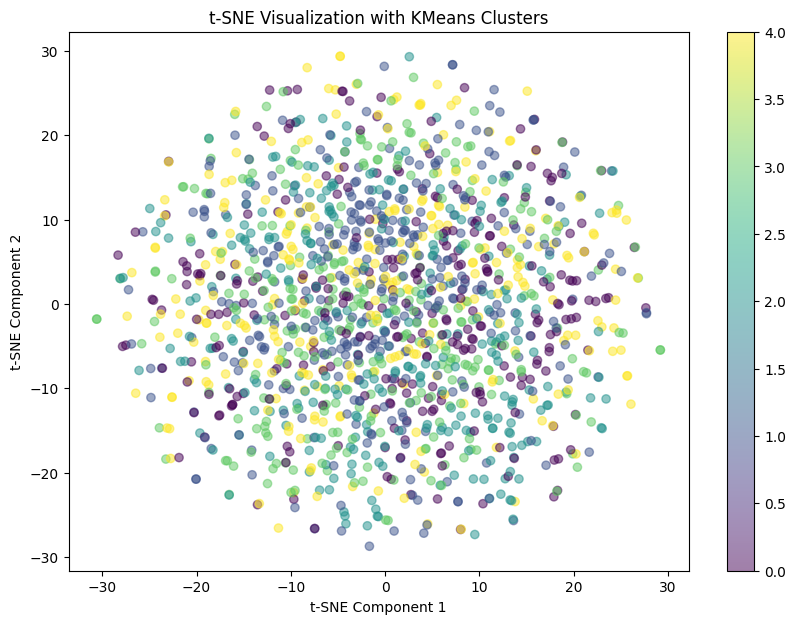

In [27]:
# Visualize clustered data using t-SNE components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title("t-SNE Visualization with KMeans Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()